**Using LeNet on Mnist dataset.**

Loading data from Keras dataset.

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28), x_test shape: (10000, 28, 28)


Visualizing 5th data from x_train for fun. 

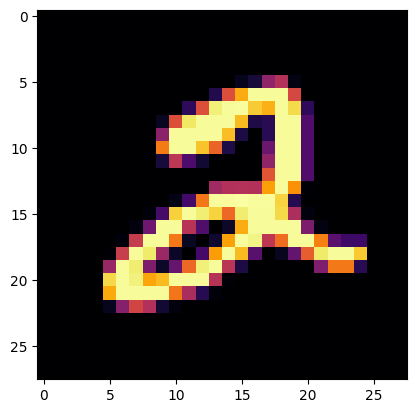

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap = 'inferno')
plt.show()

**Preprocessing the data.**

* Reshape images into the required size of Keras
* Convert integer values into float values
* Normalize data
* One-hot encoding labels

In [22]:
from keras.utils import to_categorical

def preprocess_input(x_train, x_test, y_train, y_test):
    
    # Reshaping image into the required size of Keras
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
    
    #Converting image into float and normalizing it.
    x_train = x_train.astype('float32')/255.0
    x_test = x_test.astype('float32')/255
    
    # One-hot encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

LeNet Architecture:
--> Used tanh as an activation function. 
--> 5 layers: 
    -> 1st layer: 1 Conv2D having size (5,5,6) with AveragePooling2D of size (2,2) having stride = 2.
    -> 2nd layer: 1 Conv2D having size (5,5,16) with AveragePooling2D of size (2,2) having stride = 2.
    -> layer: Flatten
    -> 3rd layer: fully connected nodes having 120 nodes.
    -> 4th layer: fully connected nodes having 84 nodes. 
    -> 5th layer: Softmax with 10 classes.   

**Building LeNet**

In [12]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import Sequential
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy

In [18]:
def LeNet():
    model = Sequential()

    model.add(Conv2D(6, kernel_size = (5, 5), activation = 'tanh', input_shape = (28, 28, 1), padding = 'valid'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

    model.add(Conv2D(16, kernel_size = (5, 5), activation = 'tanh', padding = 'valid'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

    model.add(Flatten())

    model.add(Dense(120, activation = 'tanh'))
    model.add(Dense(84, activation = 'tanh'))
    model.add(Dense(10, activation = 'Softmax'))
    
    opt = SGD(learning_rate=0.01)
    model.compile(loss = categorical_crossentropy, optimizer =opt, metrics = ['accuracy'])
    
    return model

In [19]:
LeNet().summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

In [24]:
def train_model(model, x_train, y_train, x_test, y_test, epochs = 50, batch_size = 128):
    x_train, x_test, y_train, y_test = preprocess_input(x_train, x_test, y_train, y_test)
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = epochs, batch_size = batch_size, steps_per_epoch = x_train.shape[0]//batch_size, validation_steps = x_test.shape[0]//batch_size , verbose = 1)
    
    _, acc = model.evaluate(x_test, y_test, verbose =1)
    return acc, history

def plotting(history):
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(history.history['val_accuracy'], color = 'red', label = "train")
    plt.legend()
    plt.show()

In [25]:
acc, history = train_model(LeNet(), x_train, y_train, x_test, y_test, epochs = 50, batch_size = 128)

Epoch 1/50
468/468 [==============================] - 5s 10ms/step - loss: 1.1678 - accuracy: 0.7042 - val_loss: 0.5605 - val_accuracy: 0.8606
Epoch 2/50
468/468 [==============================] - 5s 10ms/step - loss: 0.4648 - accuracy: 0.8788 - val_loss: 0.3699 - val_accuracy: 0.9038
Epoch 3/50
468/468 [==============================] - 4s 9ms/step - loss: 0.3410 - accuracy: 0.9077 - val_loss: 0.2899 - val_accuracy: 0.9204
Epoch 4/50
468/468 [==============================] - 4s 10ms/step - loss: 0.2771 - accuracy: 0.9245 - val_loss: 0.2411 - val_accuracy: 0.9309
Epoch 5/50
468/468 [==============================] - 4s 9ms/step - loss: 0.2346 - accuracy: 0.9350 - val_loss: 0.2062 - val_accuracy: 0.9408
Epoch 6/50
468/468 [==============================] - 4s 9ms/step - loss: 0.2057 - accuracy: 0.9428 - val_loss: 0.1814 - val_accuracy: 0.9474
Epoch 7/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1816 - accuracy: 0.9495 - val_loss: 0.1626 - val_accuracy: 0.9529
Epo

Accuracy: 98.450%


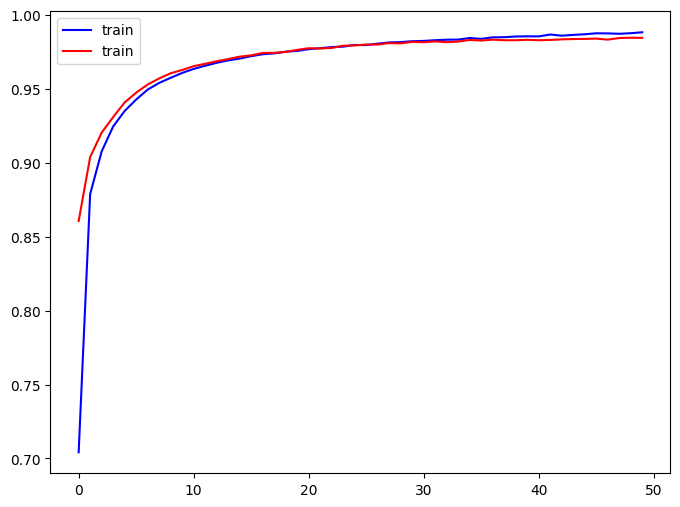

In [26]:
print(f"Accuracy: {acc*100:.3f}%")
plotting(history)